In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('./datos/top_consultas.csv')

In [16]:
series_tiempo_valores = pd.read_csv('./datos/series-tiempo-valores.csv')

In [17]:
top_series = df.serie_id.unique()
# top_series

In [46]:
# top_series = df.serie_id.unique()


In [18]:
series_tiempo_valores_top = series_tiempo_valores.loc[series_tiempo_valores.serie_id.isin(top_series)]

In [24]:
series_tiempo_valores_top['indice_tiempo'] = pd.to_datetime(series_tiempo_valores_top['indice_tiempo'])
series_tiempo_valores_top.set_index('indice_tiempo', inplace=True)

In [25]:
# Group by serie_id and resample with monthly frequency, aggregating with mean
grouped_df = series_tiempo_valores_top.groupby('serie_id').resample('M').mean()

# Reset the index to convert it back to columns
grouped_df.reset_index(inplace=True)

## Inicio y fin de las series

In [30]:
# Group by serie_id and aggregate the earliest and latest dates
date_table = grouped_df.groupby('serie_id').agg({'indice_tiempo': ['min', 'max']})

# Reset column names
date_table.columns = ['earliest_date', 'latest_date']

# # Format the dates to yyyy-mm
# date_table['earliest_date'] = date_table['earliest_date'].dt.strftime('%Y-%m')
# date_table['latest_date'] = date_table['latest_date'].dt.strftime('%Y-%m')

# Print the resulting table
display(date_table)

,earliest_date,latest_date
serie_id,,
101.1_I2NG_2016_M_22,2016-04-30,2023-03-31
103.1_I2N_2016_M_15,2016-04-30,2023-03-31
103.1_I2N_2016_M_19,2016-04-30,2023-03-31
11.3_VMASD_2004_M_23,2004-01-31,2023-02-28
11.3_VMATC_2004_M_12,2004-01-31,2023-02-28
116.4_TCRZE_2015_D_36_4,1997-01-31,2023-03-31
131.1_FET_0_0_12,1971-01-31,2023-03-31
143.3_ICE_SER_VM_2004_A_34,2004-02-29,2023-02-28
143.3_NO_PR_2004_A_21,2004-01-31,2023-02-28


<Axes: >

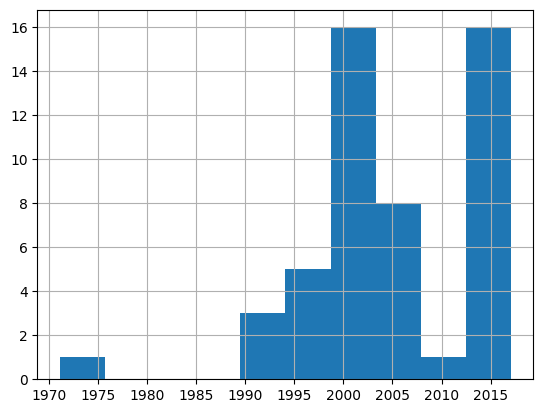

In [31]:
date_table.earliest_date.hist()

## Correlaciones

In [35]:
data = grouped_df.loc[grouped_df.indice_tiempo > '2000']


In [42]:
CS = data.set_index(['indice_tiempo', 'serie_id'])['valor'].unstack()
CS.corr().round(2)

serie_id,101.1_I2NG_2016_M_22,103.1_I2N_2016_M_15,103.1_I2N_2016_M_19,11.3_VMASD_2004_M_23,11.3_VMATC_2004_M_12,116.4_TCRZE_2015_D_36_4,131.1_FET_0_0_12,143.3_ICE_SER_VM_2004_A_34,143.3_NO_PR_2004_A_21,143.3_NO_PR_2004_A_31,...,74.3_IET_0_M_16,74.3_ISC_0_M_19,89.1_IR_BCRA1_M_0_M_26,89.1_TIPF35D_0_0_35,89.2_TS_INTEALL_0_D_18,89.2_TS_INTELAR_0_D_20,89.2_TS_INTE_PM_0_D_16,92.1_RID_0_0_32,92.1_TCV_0_0_21,94.2_UVAD_D_0_0_10
serie_id,,,,,,,,,,,,,,,,,,,,,
101.1_I2NG_2016_M_22,1.00,1.00,1.00,0.09,0.11,-0.11,0.48,0.02,-0.01,0.12,...,0.58,0.17,0.70,0.76,0.41,0.74,0.56,-0.36,0.98,1.00
103.1_I2N_2016_M_15,1.00,1.00,1.00,0.10,0.11,-0.11,0.47,0.03,0.00,0.12,...,0.59,0.17,0.70,0.76,0.40,0.74,0.55,-0.37,0.98,1.00
103.1_I2N_2016_M_19,1.00,1.00,1.00,0.09,0.11,-0.11,0.48,0.02,-0.01,0.12,...,0.58,0.17,0.70,0.76,0.41,0.74,0.56,-0.36,0.98,1.00
11.3_VMASD_2004_M_23,0.09,0.10,0.09,1.00,0.75,-0.48,-0.30,0.09,0.76,0.71,...,0.74,-0.24,0.38,0.08,0.06,0.10,-0.07,0.31,-0.06,0.07
11.3_VMATC_2004_M_12,0.11,0.11,0.11,0.75,1.00,-0.50,-0.16,0.08,0.71,0.83,...,0.61,-0.38,0.57,0.27,0.30,0.29,0.13,0.48,0.05,0.09
116.4_TCRZE_2015_D_36_4,-0.11,-0.11,-0.11,-0.48,-0.50,1.00,0.09,0.11,-0.75,-0.83,...,-0.21,0.55,-0.72,-0.20,-0.51,-0.54,0.39,-0.35,-0.36,-0.09
131.1_FET_0_0_12,0.48,0.47,0.48,-0.30,-0.16,0.09,1.00,0.06,-0.37,-0.40,...,-0.44,-0.03,-0.39,-0.09,0.08,0.03,0.76,-0.12,0.08,0.46
143.3_ICE_SER_VM_2004_A_34,0.02,0.03,0.02,0.09,0.08,0.11,0.06,1.00,-0.01,-0.02,...,0.01,0.06,-0.27,-0.09,-0.10,-0.09,-0.06,-0.06,-0.02,0.03
143.3_NO_PR_2004_A_21,-0.01,0.00,-0.01,0.76,0.71,-0.75,-0.37,-0.01,1.00,0.87,...,0.74,-0.29,0.71,0.45,0.45,0.46,-0.02,0.50,0.23,-0.03


In [51]:
# !pip install fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp39-cp39-linux_x86_64.whl size=106572 sha256=bba35740cf2de159ff4cf5f47a2b08f24d9e4857b658d5529320a1b33ad4bb01
  Stored in directory: /home/matias/.cache/pip/wheels/1f/a1/63/bfd0fddb5bf0b59f564872e29272cee8a2de0cd745d88fede5
Successfully built fastdtw


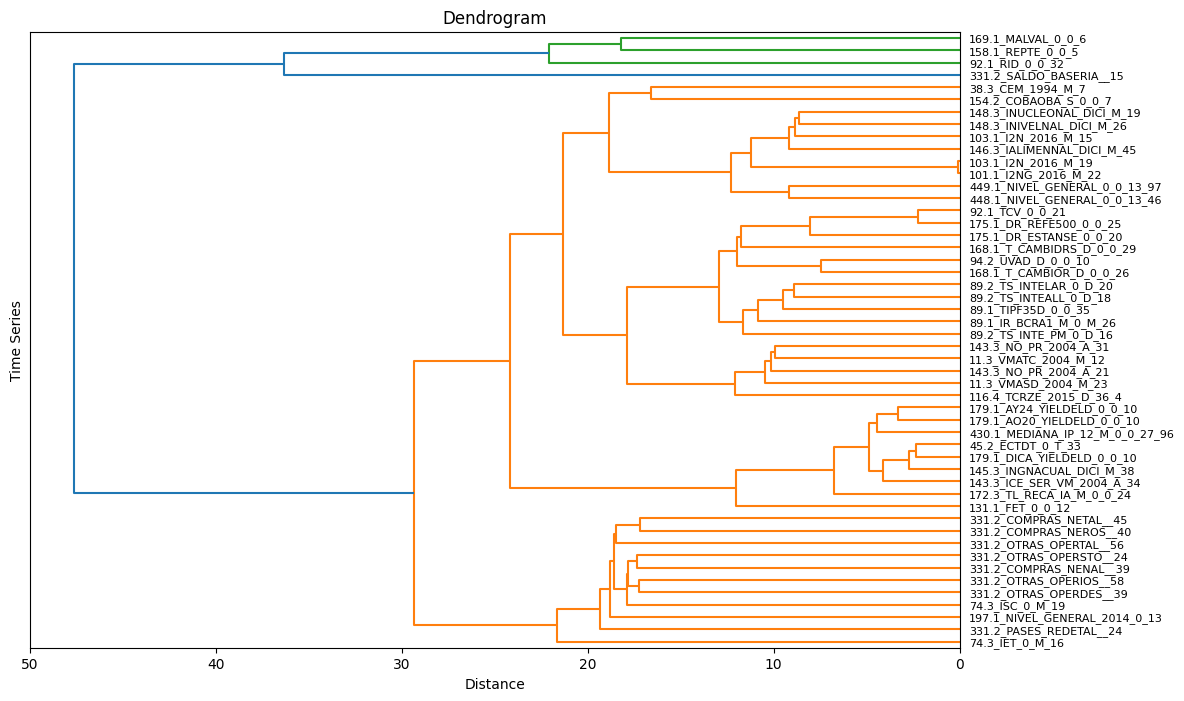

In [66]:
import numpy as np
import fastdtw
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming CS is your DataFrame with time series data

# Calculate the distance matrix using DTW
distance_matrix = np.zeros((len(CS.columns), len(CS.columns)))
for i, series1 in enumerate(CS.columns):
    for j, series2 in enumerate(CS.columns):
        distance_matrix[i, j], _ = fastdtw.fastdtw(CS[series1].dropna().values, CS[series2].dropna().values)

# Apply a logarithmic transformation to the distance matrix
log_distance_matrix = np.log(distance_matrix + 1)

# Perform hierarchical clustering on the log-transformed distance matrix
linkage = sch.linkage(log_distance_matrix, method='average')

# Create a dendrogram
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(linkage, labels=CS.columns, orientation='left')

# Customize the dendrogram plot
plt.title('Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Time Series')
plt.yticks(fontsize=8)

# Show the plot
plt.show()


In [67]:
# CS['331.2_SALDO_BASERIA__15'].plot()

# Get the order of the columns from the dendrogram
column_order = dendrogram['ivl']

# Reorder the columns in the CS DataFrame
CS = CS.reindex(columns=column_order)

In [ ]:
df

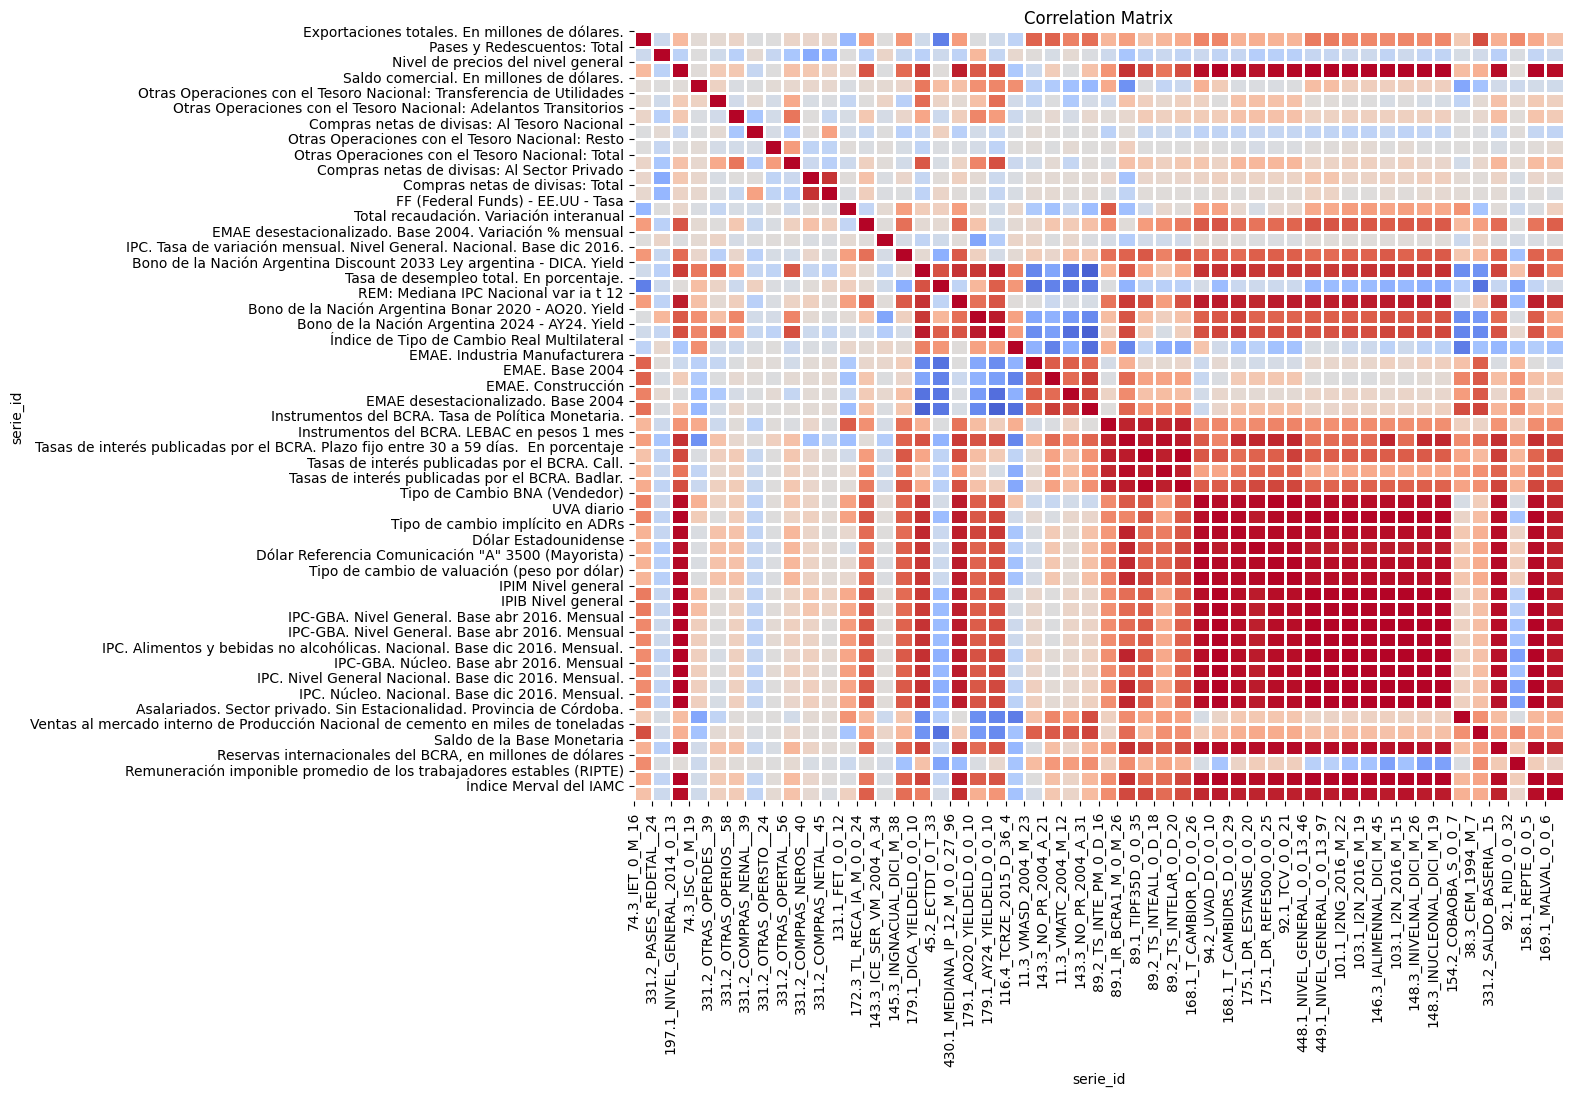

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming CS is your correlation matrix DataFrame

# Create the correlation matrix
corr_matrix = CS.corr().round(2)

# Get the unique serie_descripcion values
# serie_descriptions = df.serie_descripcion.unique()
serie_descriptions = df.set_index('serie_id').loc[column_order].serie_descripcion.values

# Create the heatmap plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, linewidths=1, linecolor='white', cbar=False)
plt.title('Correlation Matrix')
plt.xticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(serie_descriptions)), labels=serie_descriptions, rotation=0)
plt.show()


In [78]:
plots_data = data.merge(df[['serie_id', 'serie_descripcion']])
plots_data.head()

serie_id	indice_tiempo	dataset_id	distribucion_id	valor	serie_descripcion
0	101.1_I2NG_2016_M_22	2016-04-30	101.0	101.1	85.5254	IPC-GBA. Nivel General. Base abr 2016. Mensual
1	101.1_I2NG_2016_M_22	2016-05-31	101.0	101.1	89.1118	IPC-GBA. Nivel General. Base abr 2016. Mensual
2	101.1_I2NG_2016_M_22	2016-06-30	101.0	101.1	91.8528	IPC-GBA. Nivel General. Base abr 2016. Mensual
3	101.1_I2NG_2016_M_22	2016-07-31	101.0	101.1	93.7328	IPC-GBA. Nivel General. Base abr 2016. Mensual
4	101.1_I2NG_2016_M_22	2016-08-31	101.0	101.1	93.9221	IPC-GBA. Nivel General. Base abr 2016. Mensual

,serie_id,indice_tiempo,dataset_id,distribucion_id,valor,serie_descripcion
0,101.1_I2NG_2016_M_22,2016-04-30,101.0,101.1,85.5254,IPC-GBA. Nivel General. Base abr 2016. Mensual
1,101.1_I2NG_2016_M_22,2016-05-31,101.0,101.1,89.1118,IPC-GBA. Nivel General. Base abr 2016. Mensual
2,101.1_I2NG_2016_M_22,2016-06-30,101.0,101.1,91.8528,IPC-GBA. Nivel General. Base abr 2016. Mensual
3,101.1_I2NG_2016_M_22,2016-07-31,101.0,101.1,93.7328,IPC-GBA. Nivel General. Base abr 2016. Mensual
4,101.1_I2NG_2016_M_22,2016-08-31,101.0,101.1,93.9221,IPC-GBA. Nivel General. Base abr 2016. Mensual


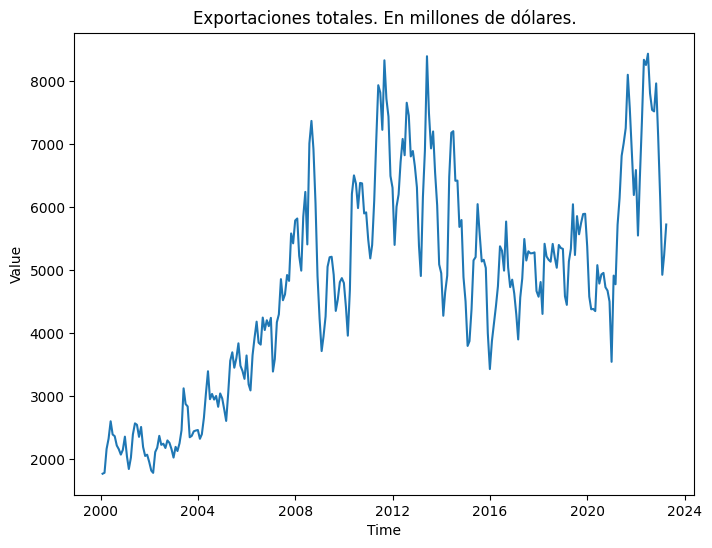

### Exportaciones totales. En millones de dólares.


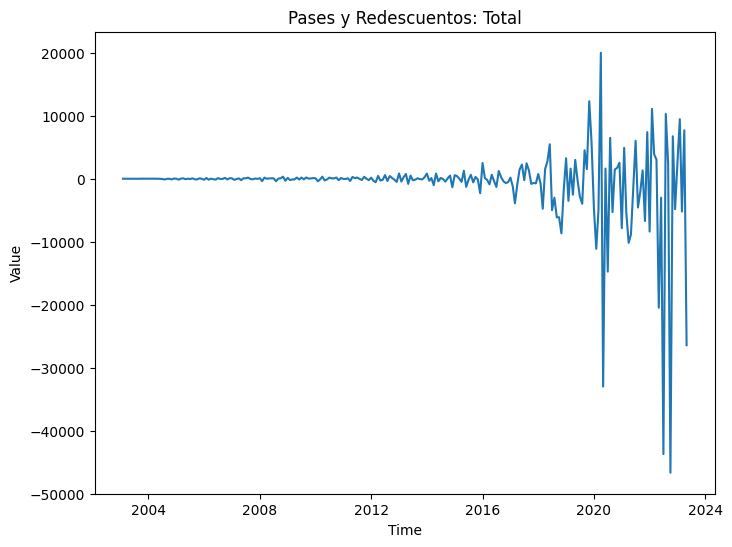

### Pases y Redescuentos: Total


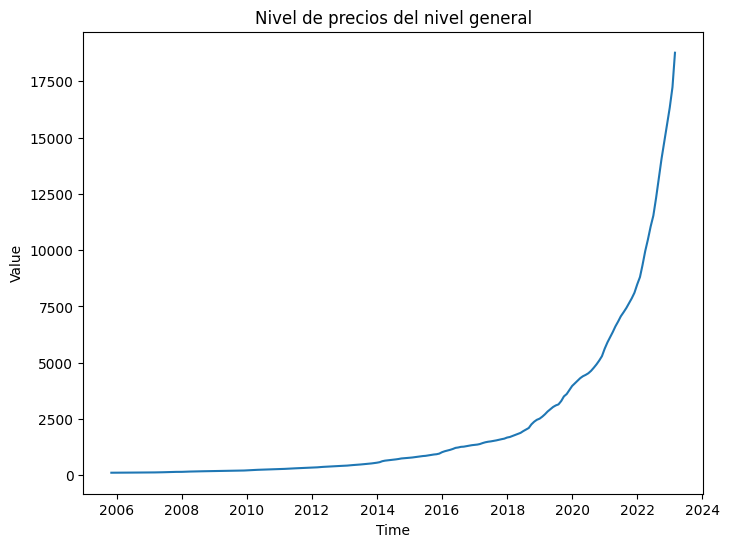

### Nivel de precios del nivel general


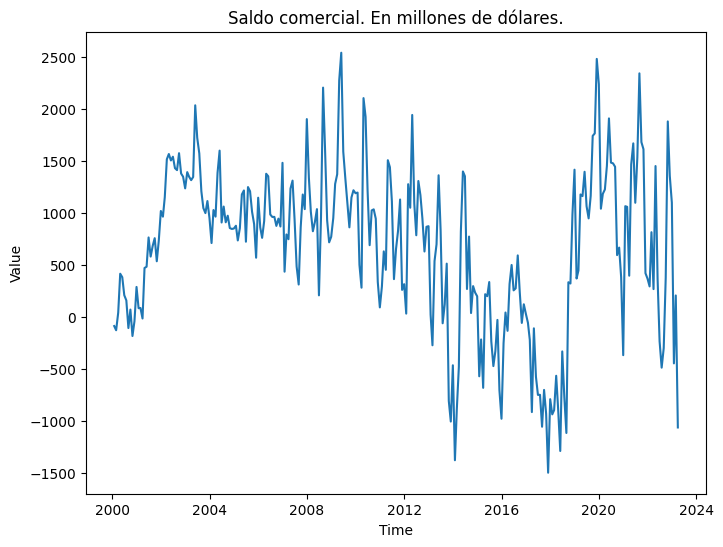

### Saldo comercial. En millones de dólares.


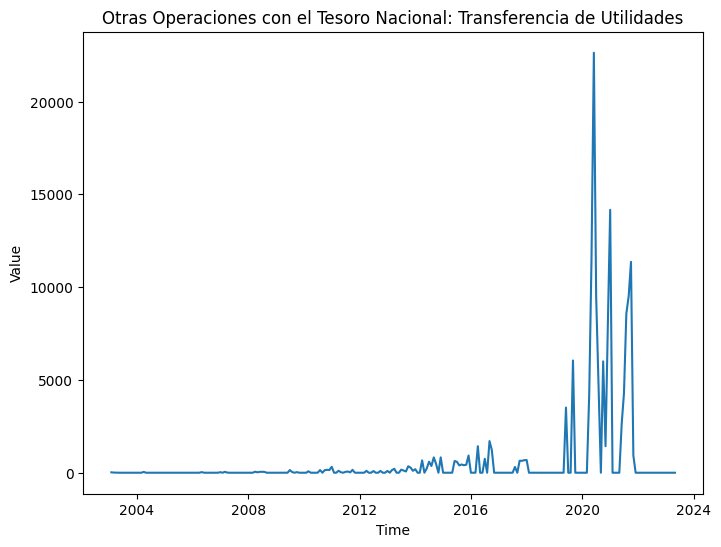

### Otras Operaciones con el Tesoro Nacional: Transferencia de Utilidades


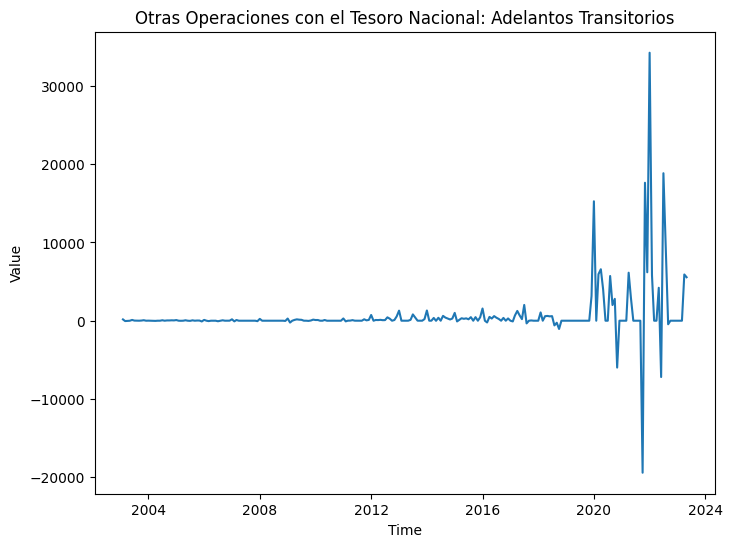

### Otras Operaciones con el Tesoro Nacional: Adelantos Transitorios


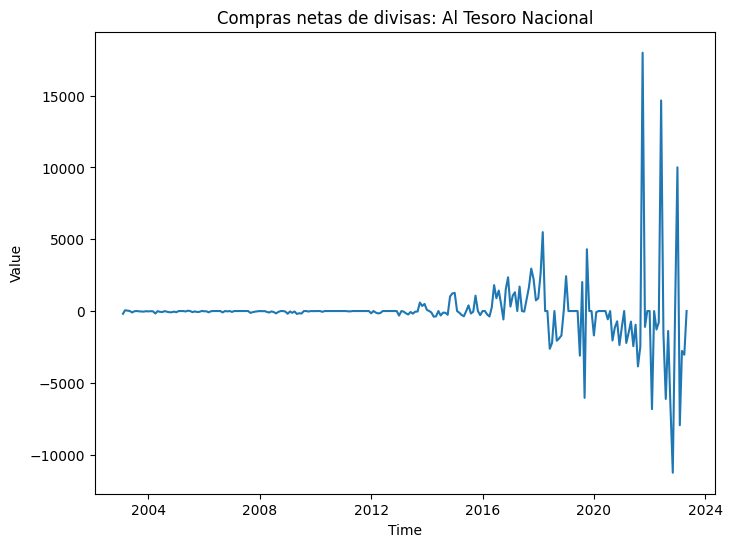

### Compras netas de divisas: Al Tesoro Nacional


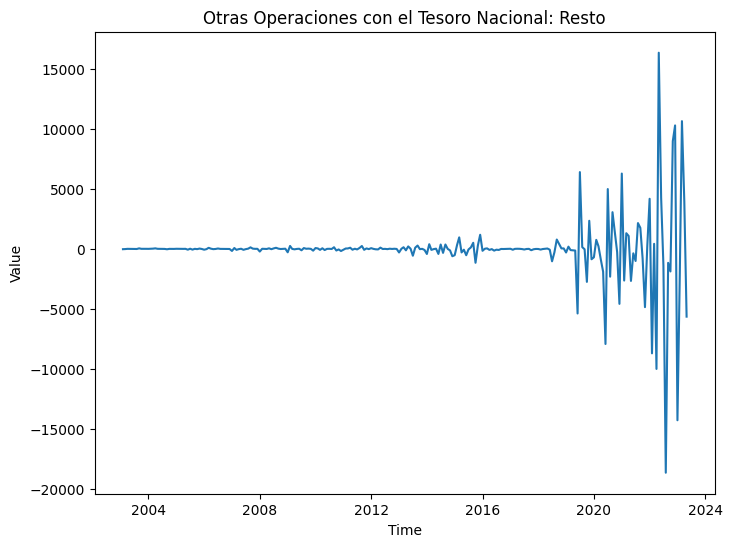

### Otras Operaciones con el Tesoro Nacional: Resto


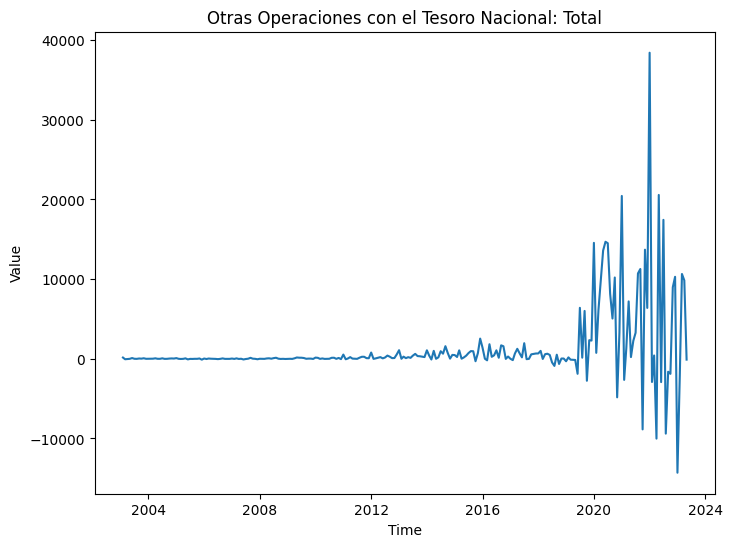

### Otras Operaciones con el Tesoro Nacional: Total


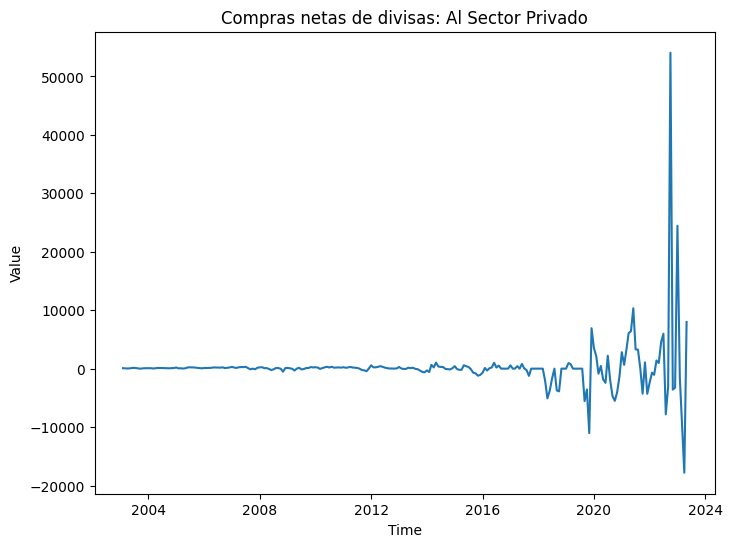

### Compras netas de divisas: Al Sector Privado


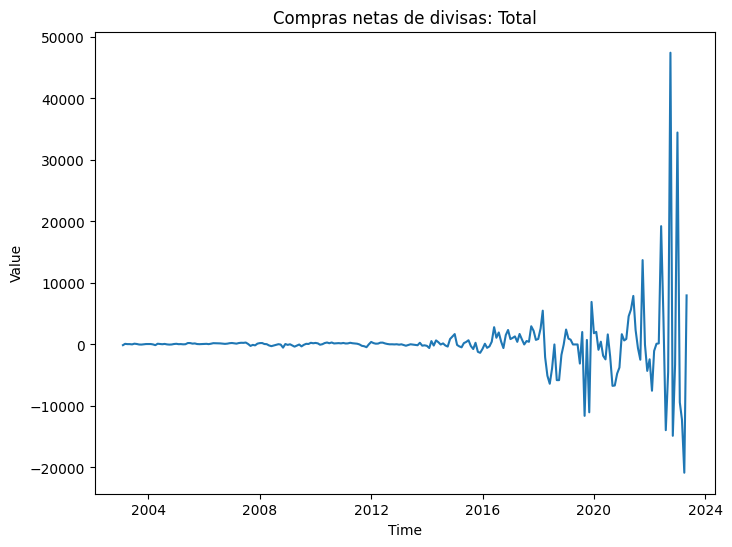

### Compras netas de divisas: Total


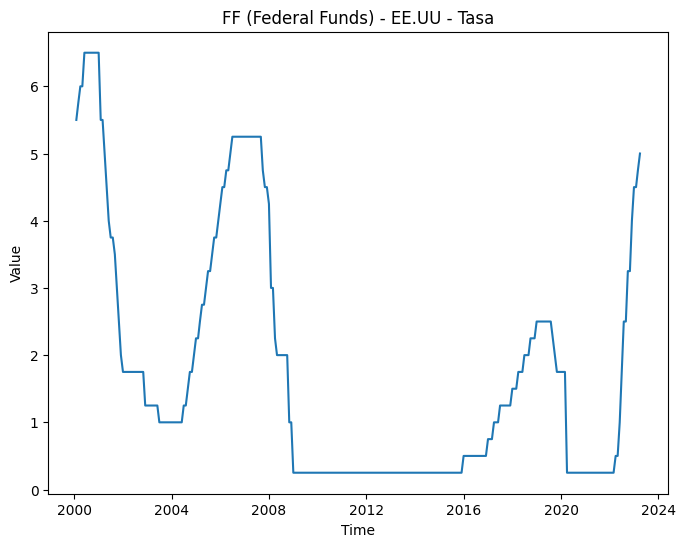

### FF (Federal Funds) - EE.UU - Tasa


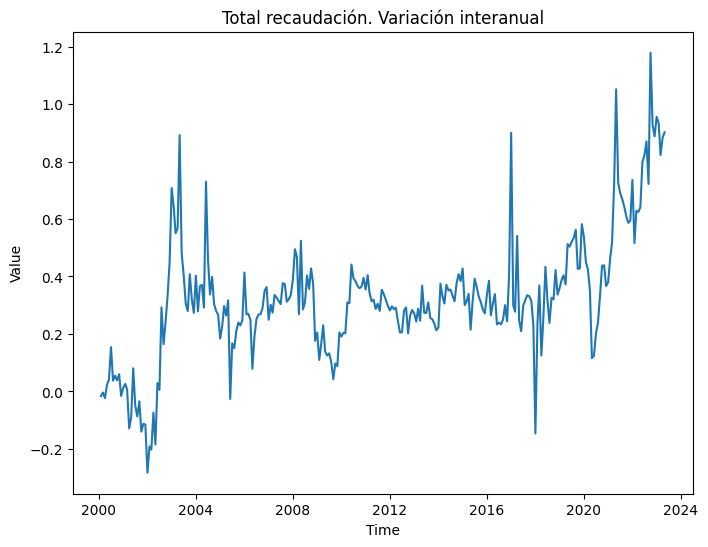

### Total recaudación. Variación interanual


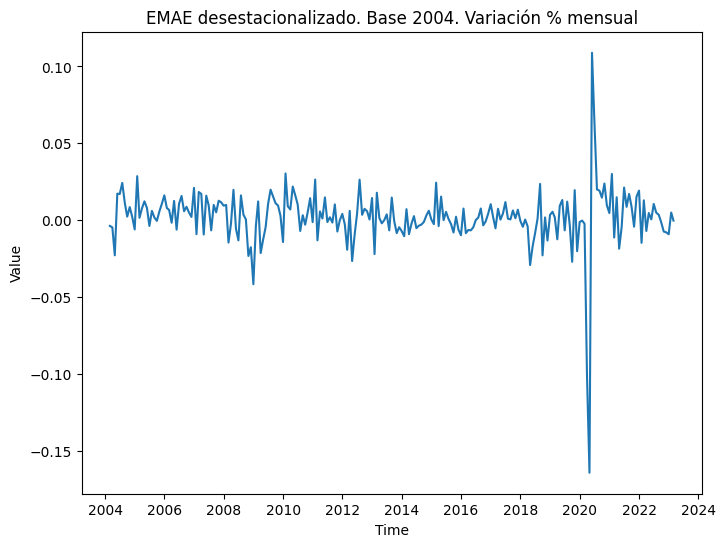

### EMAE desestacionalizado. Base 2004. Variación % mensual


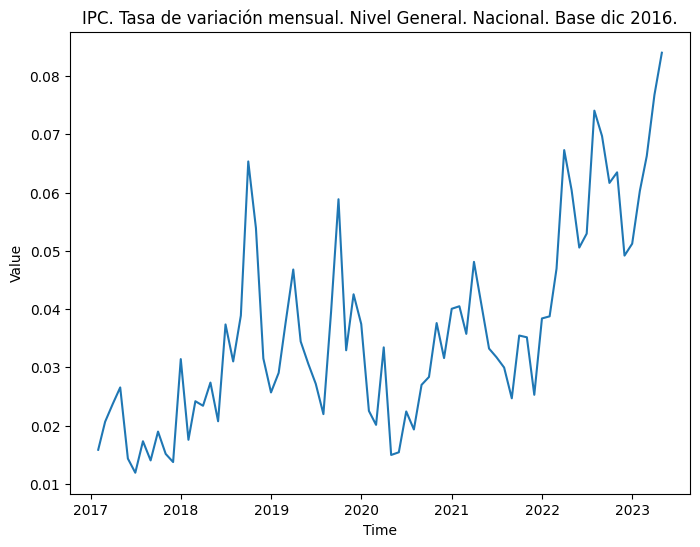

### IPC. Tasa de variación mensual. Nivel General. Nacional. Base dic 2016.


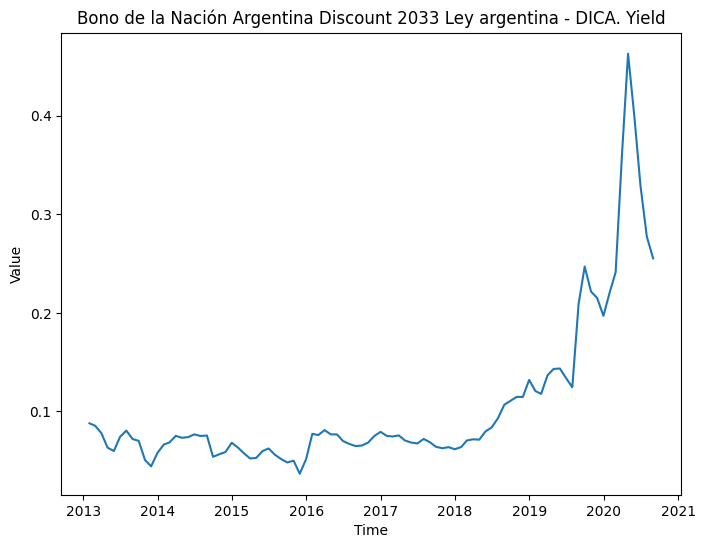

### Bono de la Nación Argentina Discount 2033 Ley argentina - DICA. Yield


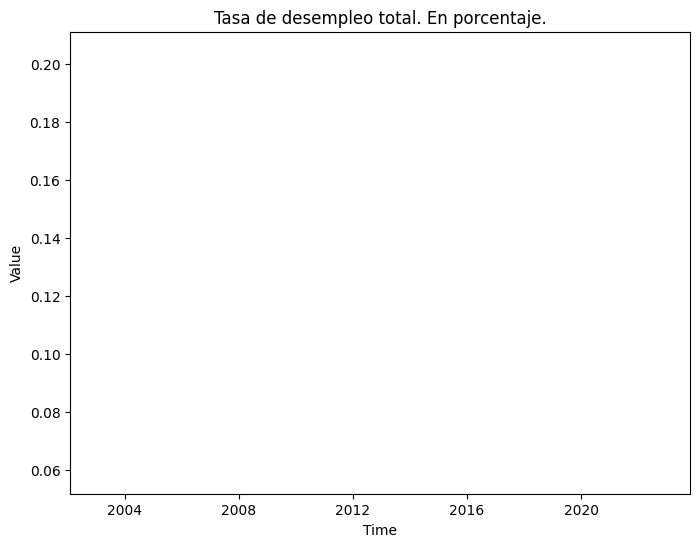

### Tasa de desempleo total. En porcentaje.


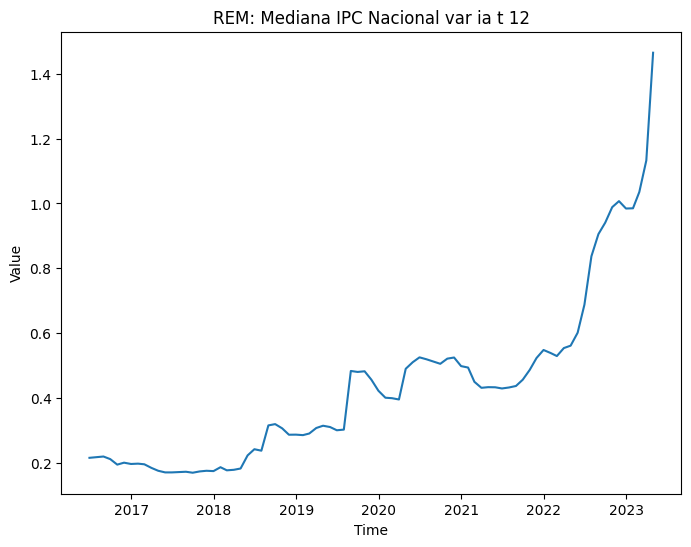

### REM: Mediana IPC Nacional var ia t 12


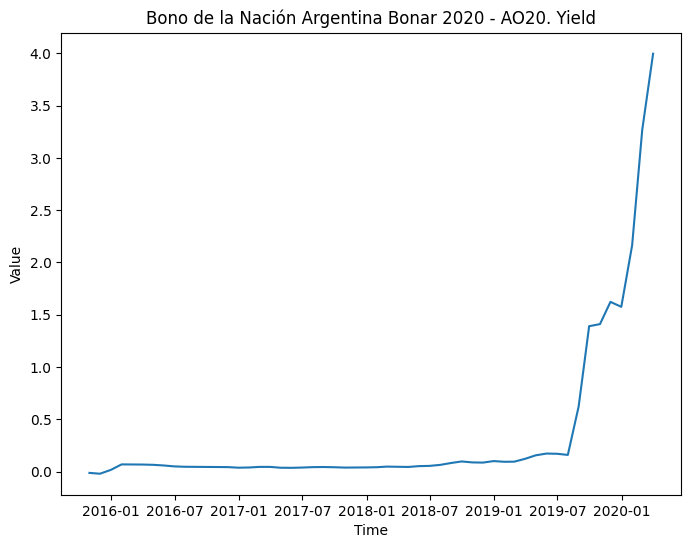

### Bono de la Nación Argentina Bonar 2020 - AO20. Yield


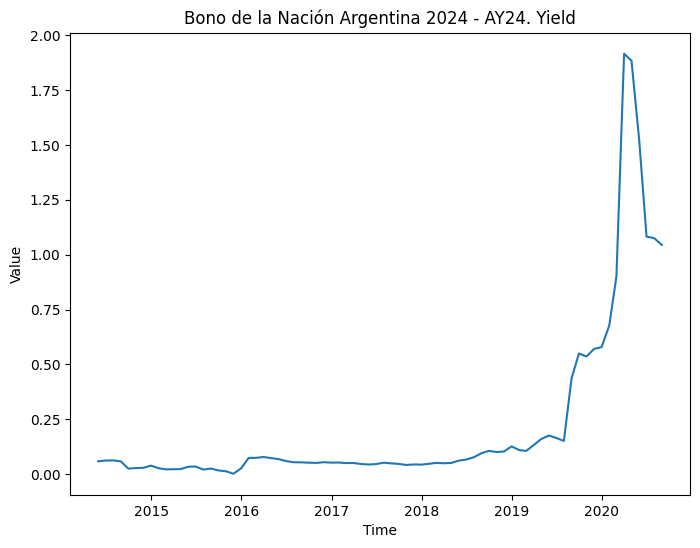

### Bono de la Nación Argentina 2024 - AY24. Yield


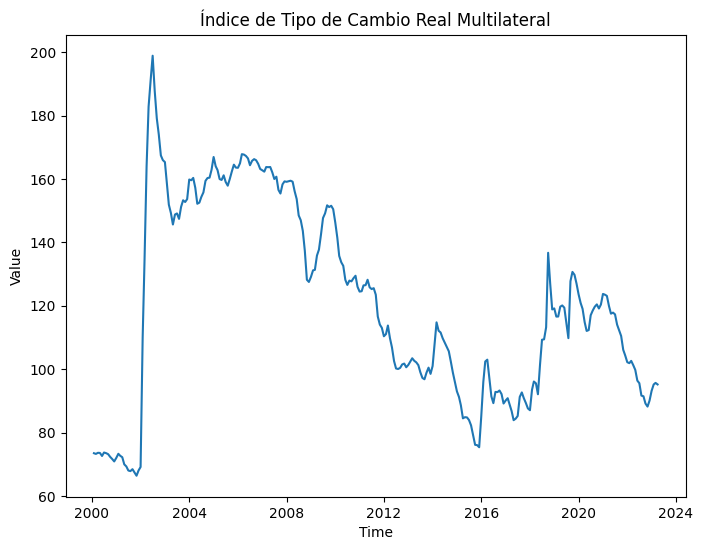

### Índice de Tipo de Cambio Real Multilateral


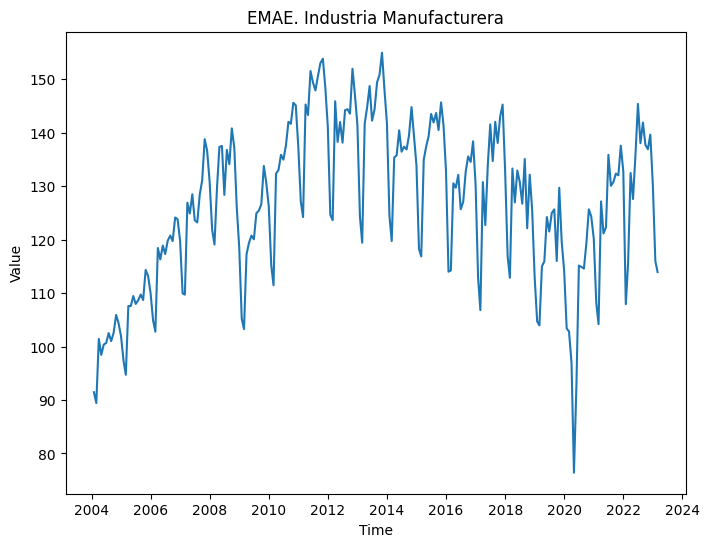

### EMAE. Industria Manufacturera


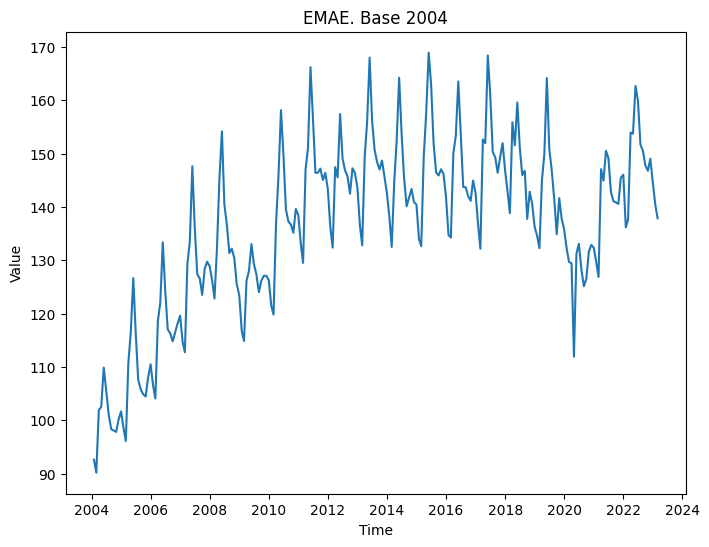

### EMAE. Base 2004


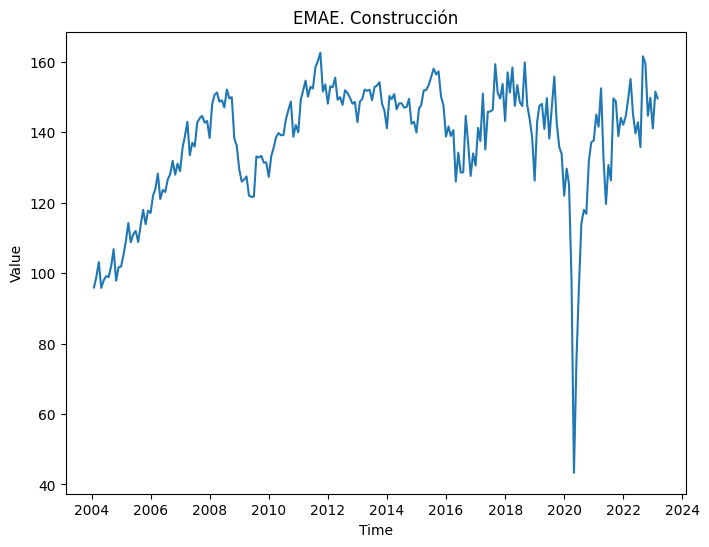

### EMAE. Construcción


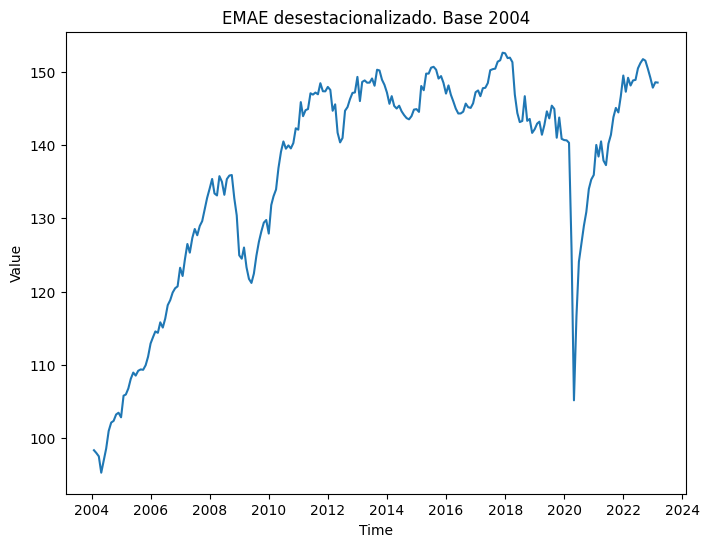

### EMAE desestacionalizado. Base 2004


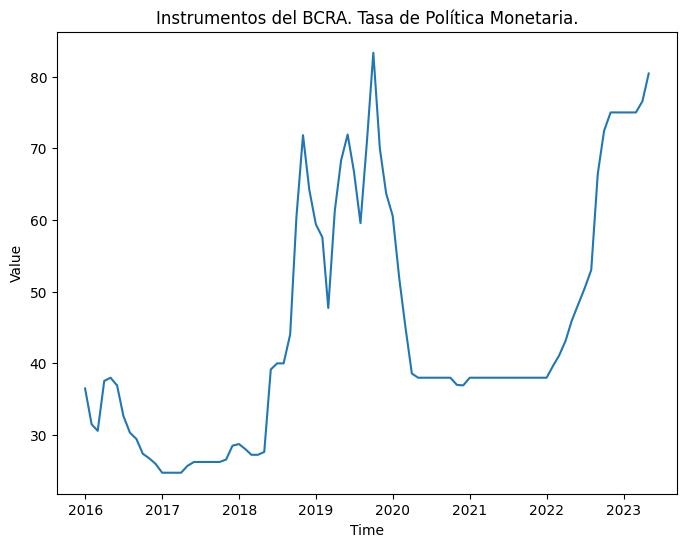

### Instrumentos del BCRA. Tasa de Política Monetaria.


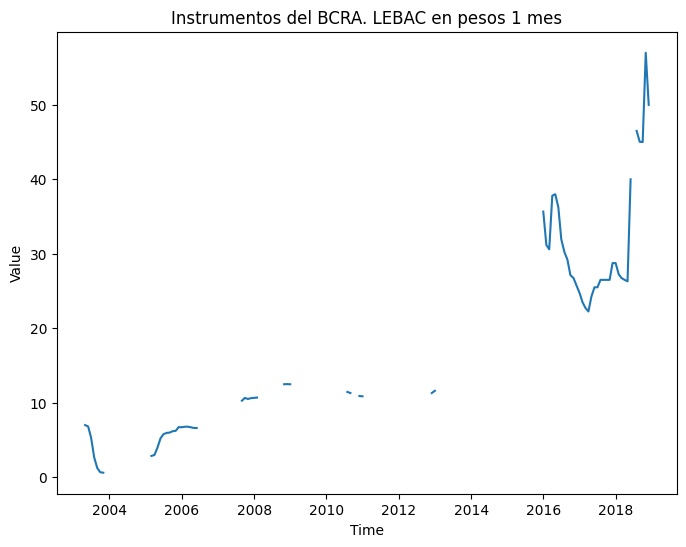

### Instrumentos del BCRA. LEBAC en pesos 1 mes


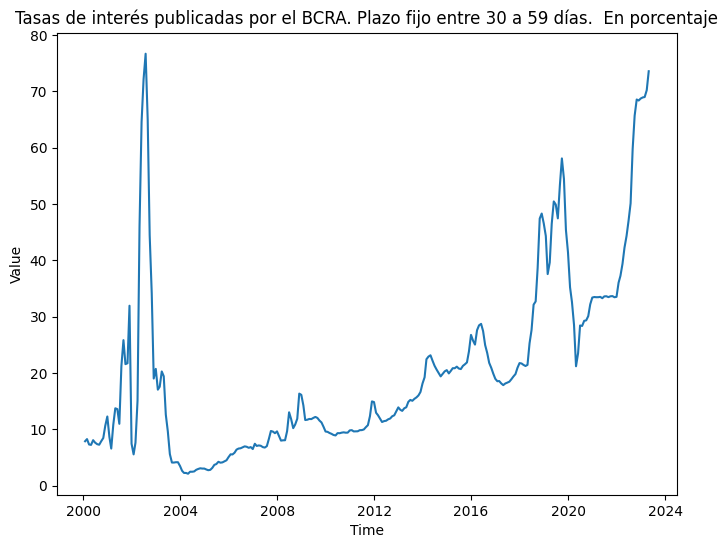

### Tasas de interés publicadas por el BCRA. Plazo fijo entre 30 a 59 días.  En porcentaje


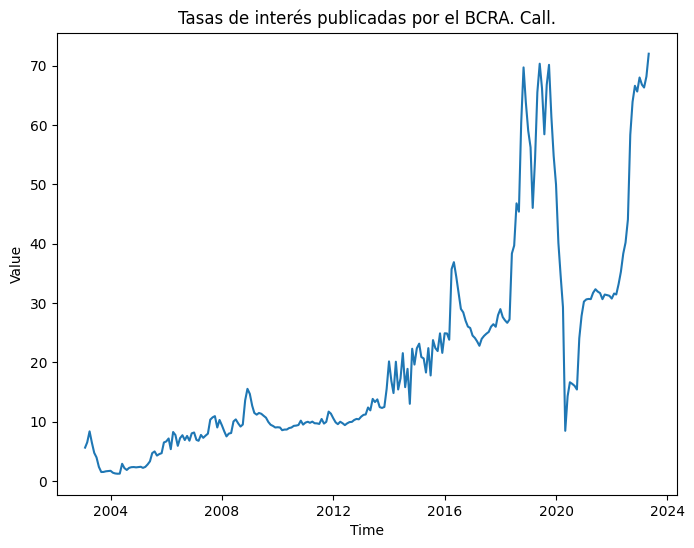

### Tasas de interés publicadas por el BCRA. Call.


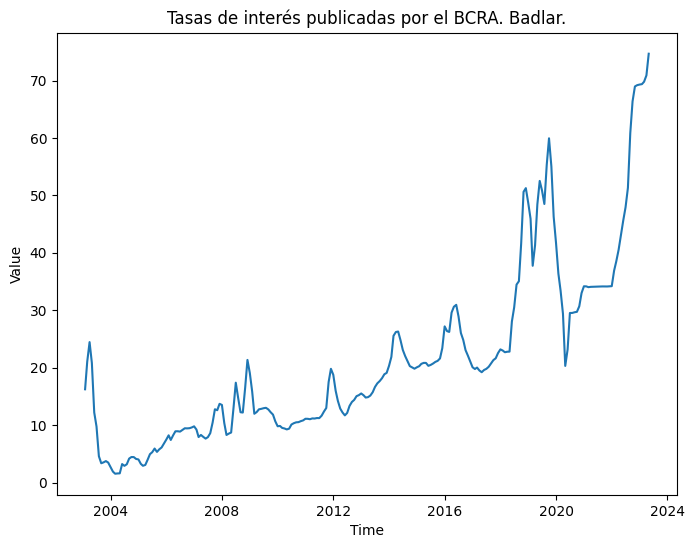

### Tasas de interés publicadas por el BCRA. Badlar.


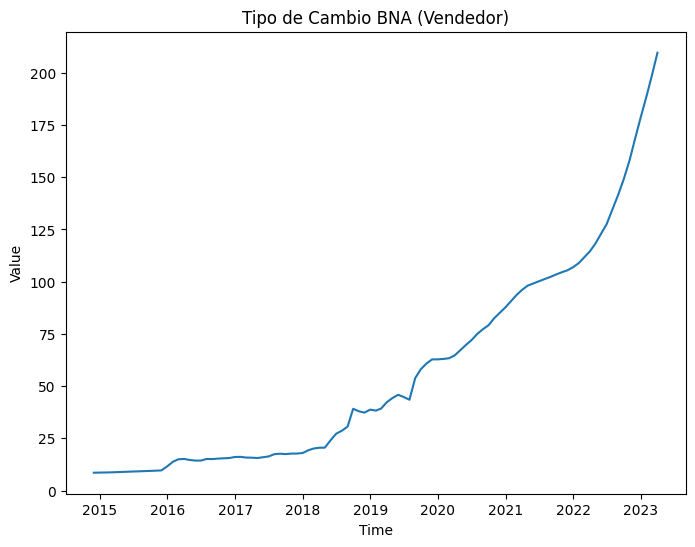

### Tipo de Cambio BNA (Vendedor)


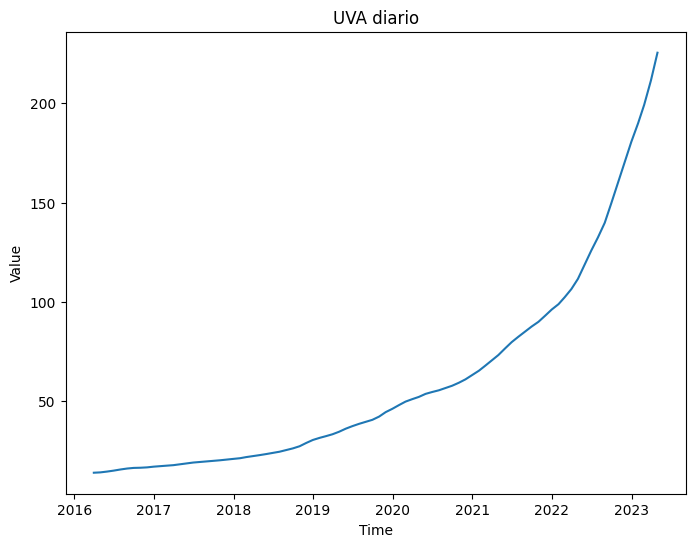

### UVA diario


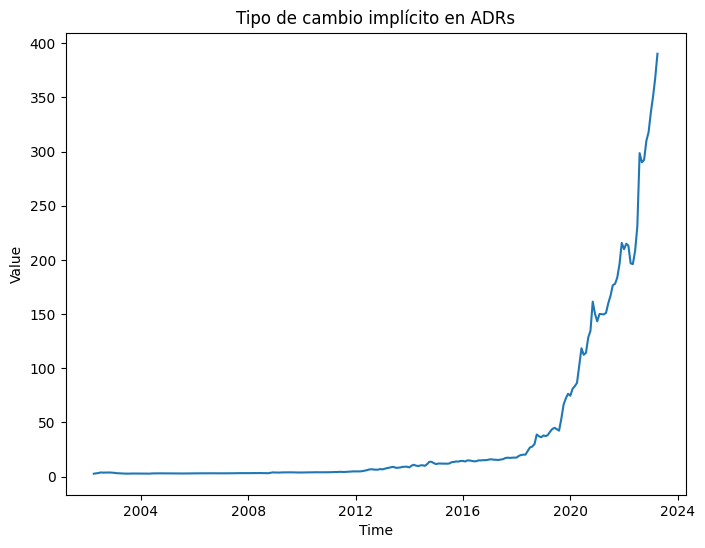

### Tipo de cambio implícito en ADRs


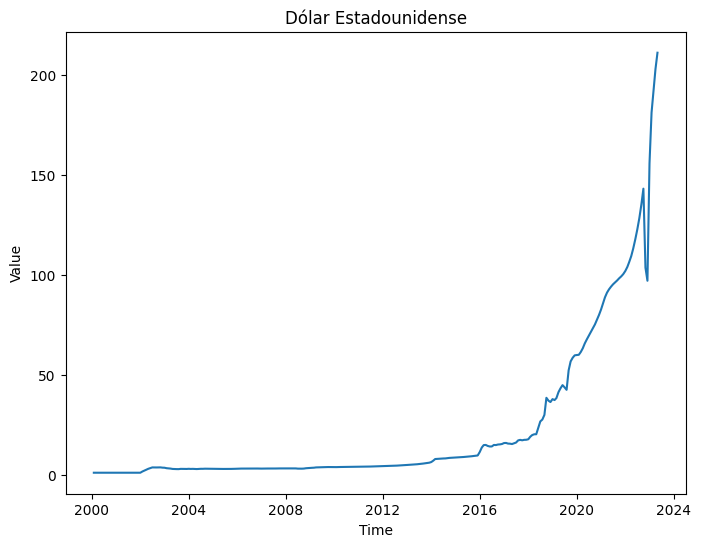

### Dólar Estadounidense


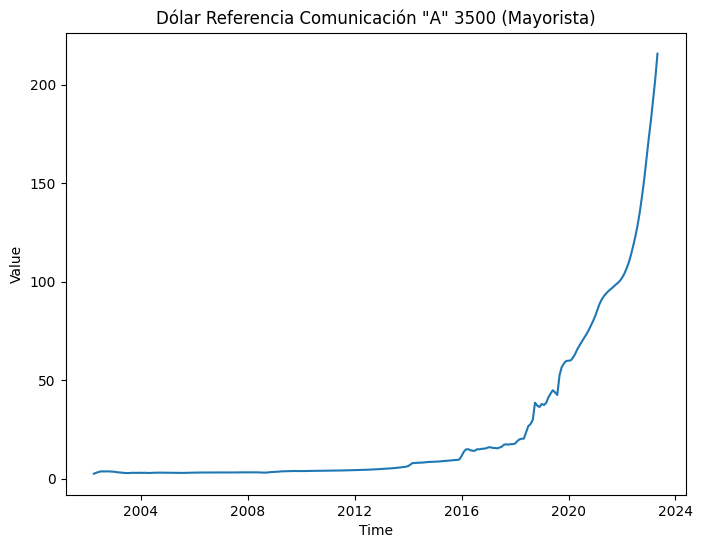

### Dólar Referencia Comunicación "A" 3500 (Mayorista)


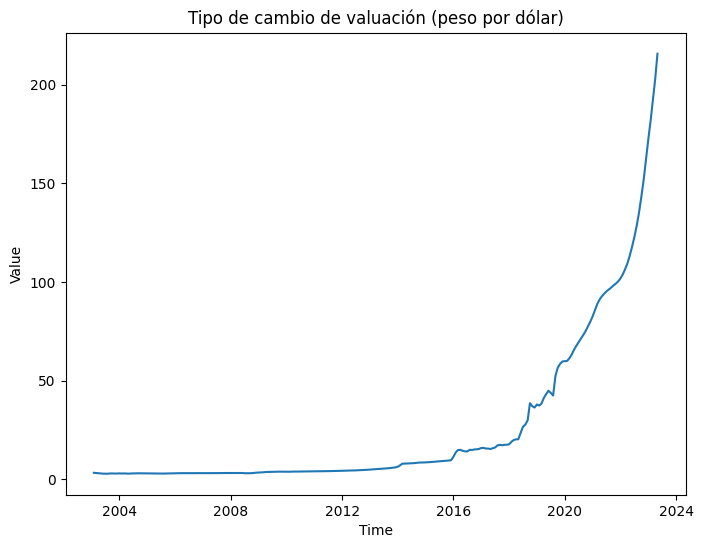

### Tipo de cambio de valuación (peso por dólar)


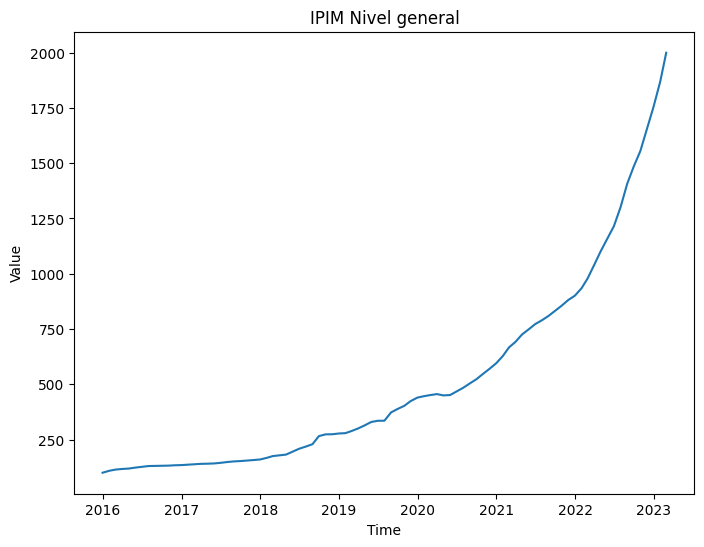

### IPIM Nivel general


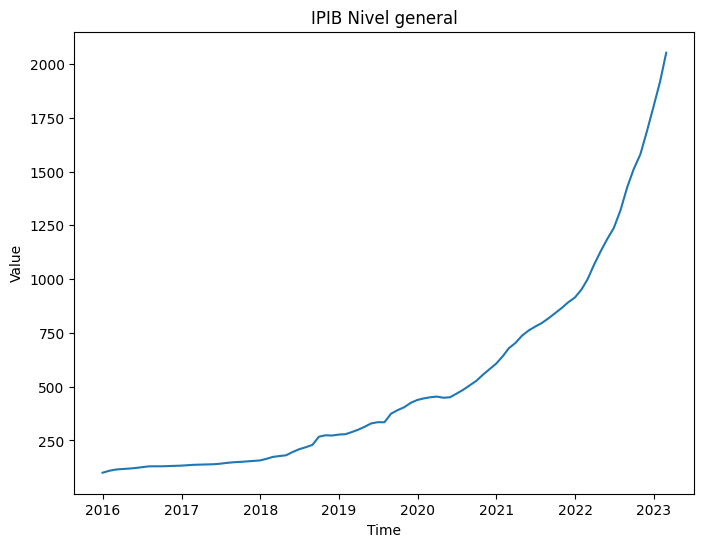

### IPIB Nivel general


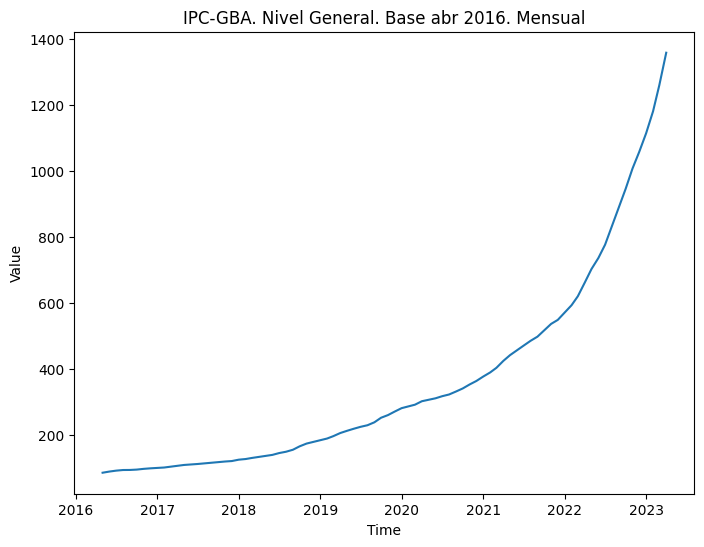

### IPC-GBA. Nivel General. Base abr 2016. Mensual


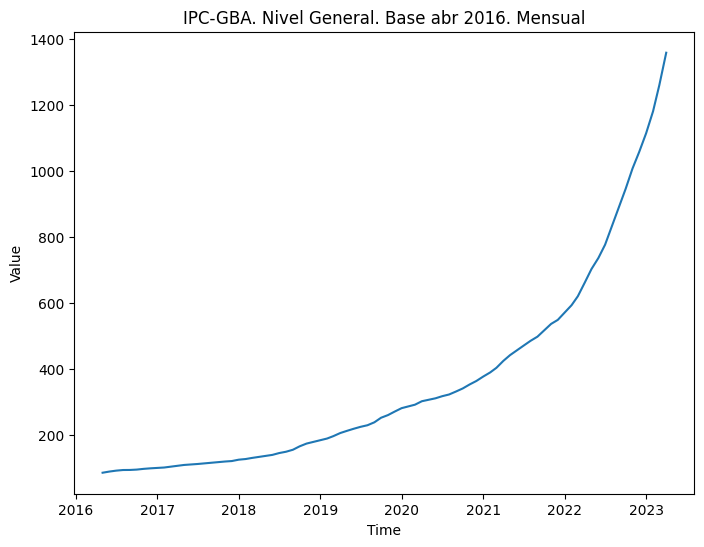

### IPC-GBA. Nivel General. Base abr 2016. Mensual


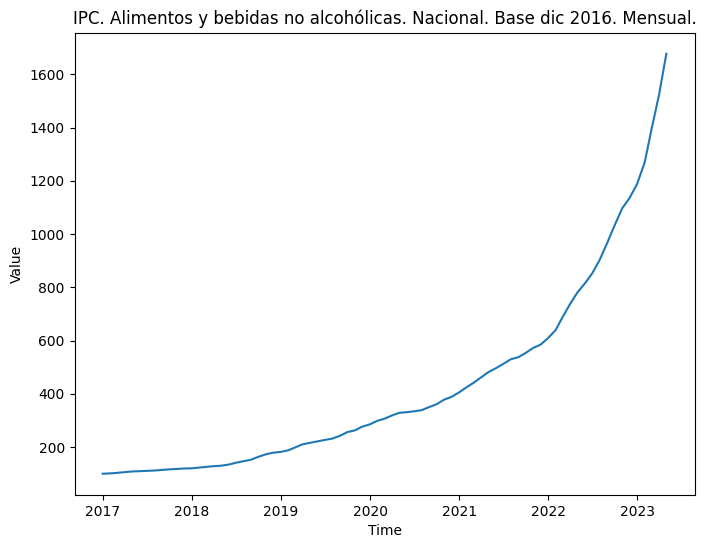

### IPC. Alimentos y bebidas no alcohólicas. Nacional. Base dic 2016. Mensual.


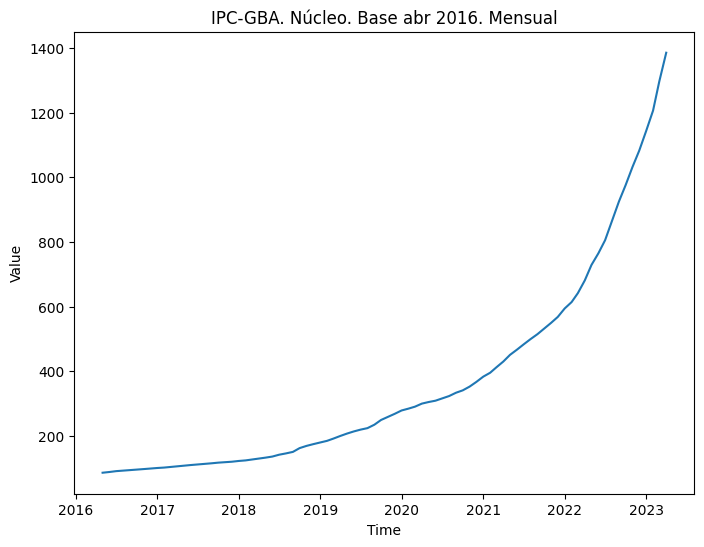

### IPC-GBA. Núcleo. Base abr 2016. Mensual


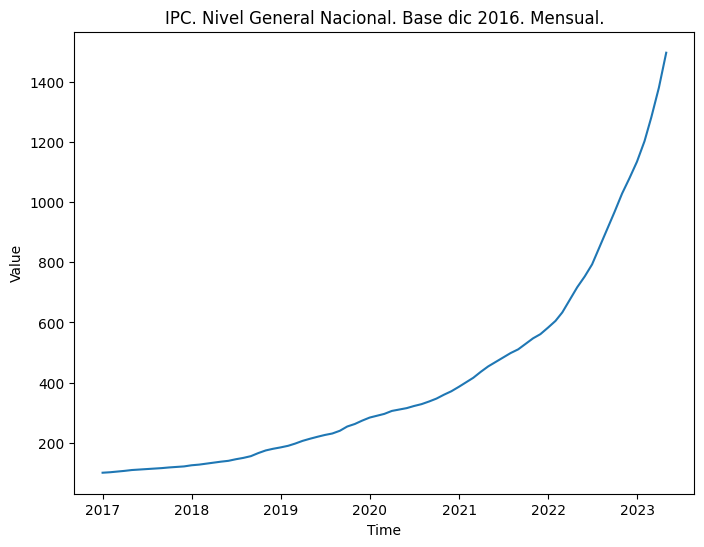

### IPC. Nivel General Nacional. Base dic 2016. Mensual.


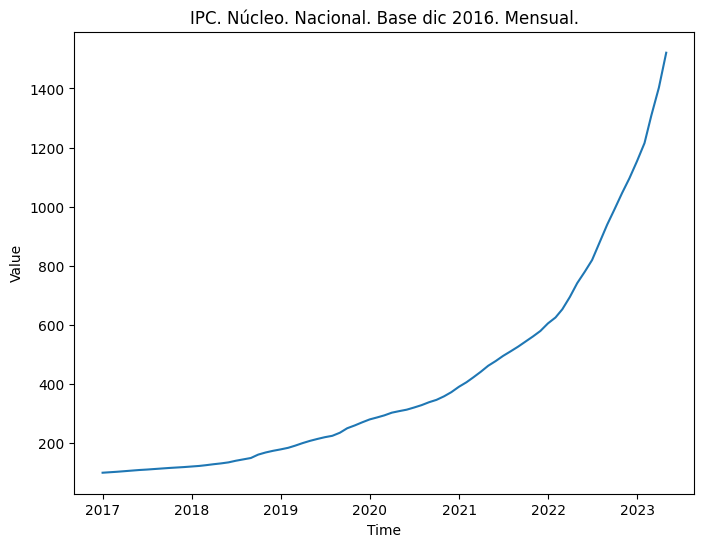

### IPC. Núcleo. Nacional. Base dic 2016. Mensual.


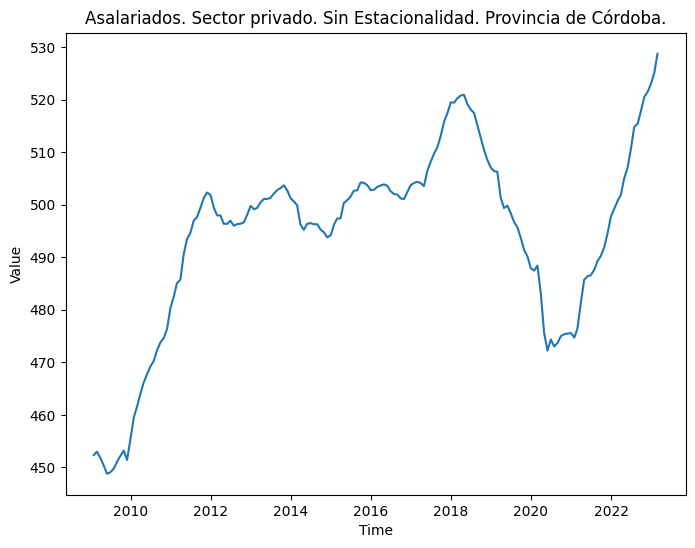

### Asalariados. Sector privado. Sin Estacionalidad. Provincia de Córdoba.


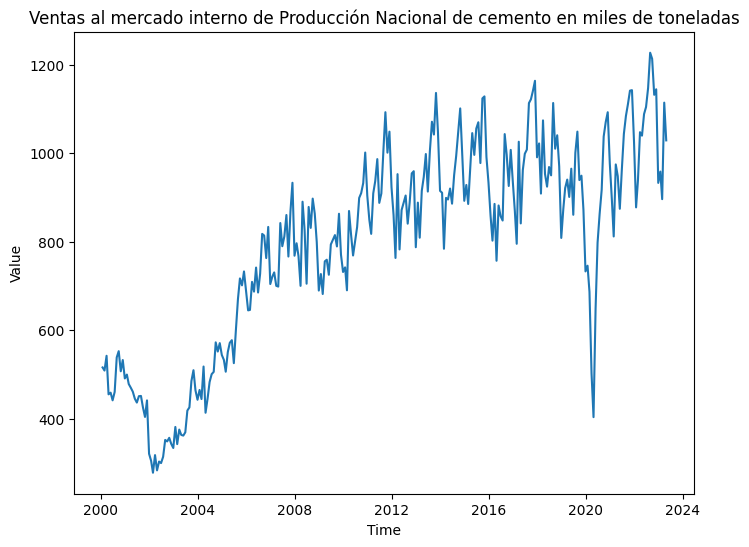

### Ventas al mercado interno de Producción Nacional de cemento en miles de toneladas


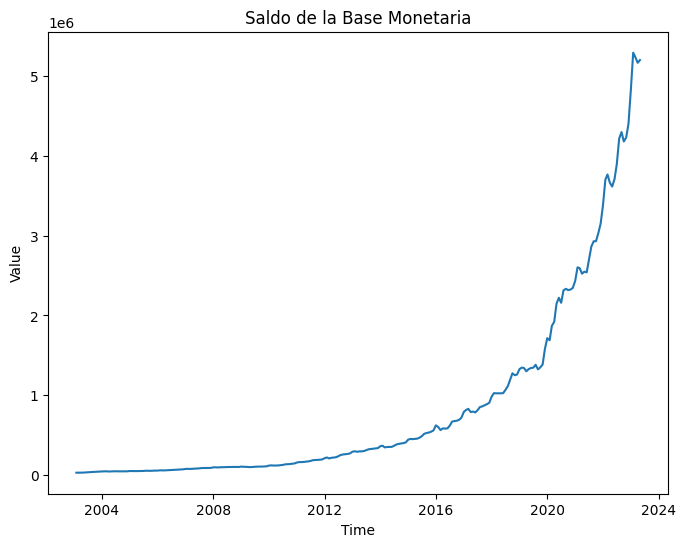

### Saldo de la Base Monetaria


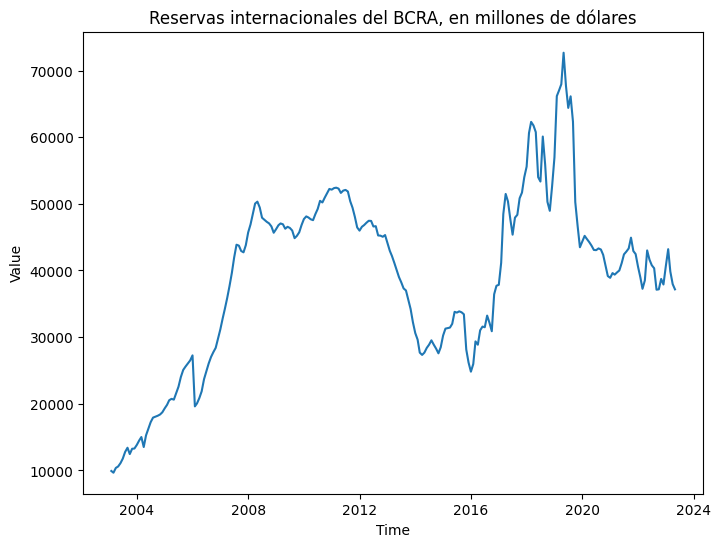

### Reservas internacionales del BCRA, en millones de dólares


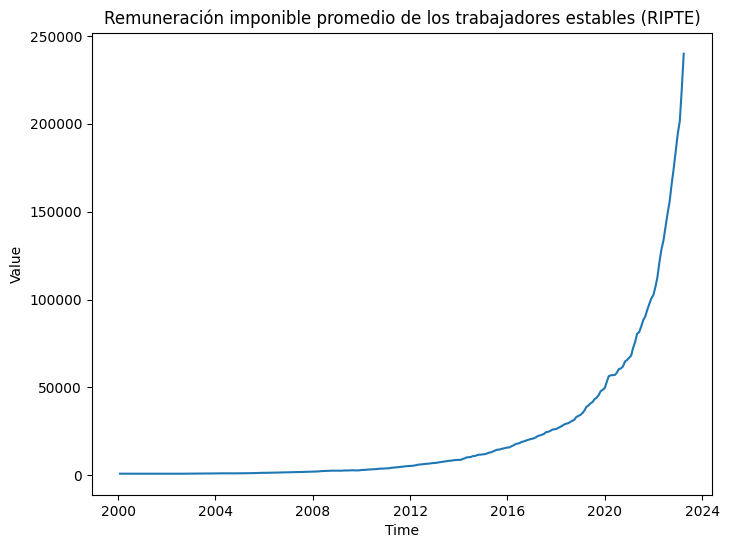

### Remuneración imponible promedio de los trabajadores estables (RIPTE)


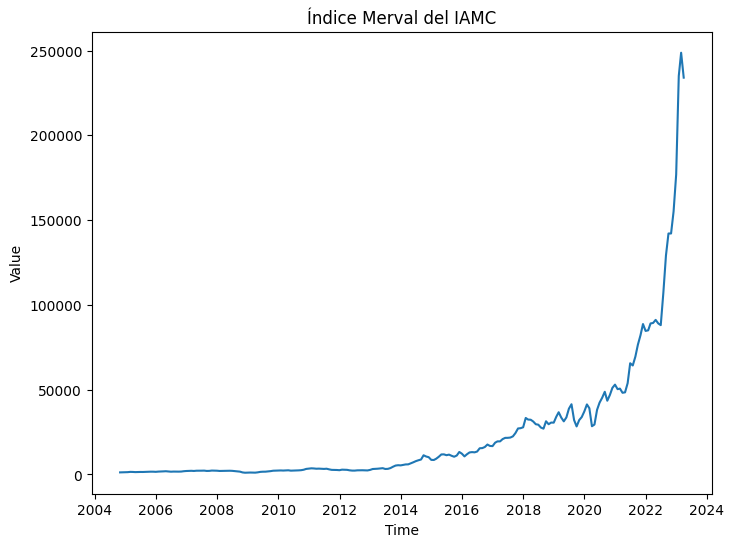

### Índice Merval del IAMC


In [79]:
import matplotlib.pyplot as plt

# Assuming CS is your DataFrame with time series data
# Assuming plots_data is your DataFrame with merged data

# Iterate over the columns in CS
for column in CS.columns:
    # Get the corresponding description
    description = plots_data.loc[plots_data['serie_id'] == column, 'serie_descripcion'].iloc[0]
    
    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.plot(CS[column])
    plt.title(description)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()
    
    # Print the Markdown heading
    print(f"### {description}")
